# **Data Selection**

## Referensi
Python for Data Analysis - Wes Mckinney
* Chaper 5.2: Essentials Functionality

## **Opening**

### Capaian Belajar
* Siswa mengetahui teknik penyeleksian data berdasarkan posisi pada baris atau kolom
* Siswa mengetahui teknik penyeleksian data beradasrkan kondisi
* Siswa mengetahui teknik penyelesaian data berdasarkan posisi pada data dengan multiindex


### Outline
* Set and Remove Index
* Data Selection by Index
* Data Selection by Condition
* Slicing Data with Multiindex

## **01 - Set and Remove**

**Outline**

1. Set and Remove Index
2. Data Selection by Index
3. Data Selection by Condition
4. Slicing Data with MultiIndex

- Kita perlu memanggil library dan untuk menjalankan code dalam notebook ini

In [1]:
# load data
import pandas as pd

### **Set and Remove Index**
---

- Index dapat diibaratkan seperti alamat, yang menjadi acuan untuk mengakses data pada series maupun dataframe.

<img src="https://www.w3resource.com/w3r_images/pandas-data-structure.svg">

- Secara default, index pada series atau dataframe akan bernilai 0 hingga N-1. Dimana N adalah banyaknya data.

- Namun, nilai index dapat dirubah menjadi menjadi nilai tertentu dengan menggunakan fungsi `set_index()`.

#### Set Index
- Rahman diminta untuk mengelola data customer. Dia diminta untuk mengakses informasi dari customer berdasarkan namanya.

- Data customer disimpan di dalam file `customer_data.csv` di dalam folder data.

- Mengakses data pada baris tertentu, dapat dilakukan dengan cara mengakses index dari series/dataframe

- Agar mudah untuk mengakses data customer berdasarkan nama, kolom `name` pada data customer dapat dijadikan sebagai index.

In [2]:
# Read Data customer
url_customer_data = 'https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-5/customers_data.csv'
customer_data = pd.read_csv(url_customer_data)
customer_data.head()

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
0,103,Carine,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
1,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
2,114,Peter,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
3,119,Janine,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
4,121,Jonas,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0


Mengubah index pada struktur data pandas, dapat dilakukan dengan 2 cara:

##### 1. Set index yang didefinisikan sendiri.

Mengubah index menggunakan index baru yang didefinisikan sendiri, dapat dilakukan dengan operasi penginputan pada attribut index dari dataframe / series

In [3]:
# melihat index awal dari customer_data
customer_data.index

RangeIndex(start=0, stop=20, step=1)

In [4]:
# membuat index baru dimulai dari angka 10
index_baru = [i for i in range(10,30)]

In [5]:
# set index dengan operasi penginputan
customer_data.index = index_baru
customer_data.head()

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
10,103,Carine,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
11,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
12,114,Peter,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
13,119,Janine,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
14,121,Jonas,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0


Saat akan mengubah index data berdasarkan index yang didefinisikan sendiri, perlu untuk memperhatikan jumlah data. Jika panjang index tidak sesuai dengan jumlah data, maka akan terjadi error.

In [6]:
# membuat index baru dimulai dari angka 10 dengan panjang 29 (kurang 1 data)
index_baru = [i for i in range(10,29)]

In [7]:
# set index dengan operasi penginputan
customer_data.index = index_baru
customer_data.head()

ValueError: Length mismatch: Expected axis has 20 elements, new values have 19 elements

##### 2. Membuat kolom pada dataframe menjadi index.

Dapat dilakukan dengan 2 cara:
- Set index saat melakukan read data dari file menggunakan parameter `index_col`

In [8]:
# Read Data
customer_data = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-5/customers_data.csv", index_col='name')
customer_data.head()

,customerNumber,phone,addressline1,city,state,postalCode,country,creditLimit
name,,,,,,,,
Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0


- Set index setelah data frame dibuat menggunakan method `.set_index()`

In [9]:
# Read Data
customer_data = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-5/customers_data.csv")

# Set kolom job sebagai index
customer_data.set_index("name")

,customerNumber,phone,addressline1,city,state,postalCode,country,creditLimit
name,,,,,,,,
Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0
Susan,124,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
Zbyszek,125,(26) 642-7555,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,0.0
Roland,128,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,59700.0
Julie,129,6505555787,5557 North Pendale Street,San Francisco,CA,94217,USA,64600.0


**Note:**
> Pada beberapa operasi dataframe menggunakan method, Agar perubahan terjadi secara permanen, perlu untuk mengubah nilai dari parameter `inplace` menjadi `True`. Jika parameter `inplace` terdapat didalam method tersebut.

In [10]:
# Read Data
customer_data = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-5/customers_data.csv")

# Set kolom job sebagai index
customer_data.set_index("name", inplace=True)
customer_data

,customerNumber,phone,addressline1,city,state,postalCode,country,creditLimit
name,,,,,,,,
Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0
Susan,124,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
Zbyszek,125,(26) 642-7555,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,0.0
Roland,128,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,59700.0
Julie,129,6505555787,5557 North Pendale Street,San Francisco,CA,94217,USA,64600.0


#### Set Columns

Selain mengubah index, pandas juga memungkinkan pengguna untuk mengubah nama kolom dari dataframe yang telah di buat. Hal ini dapat dilakukan dengan melakukan operasi penginputan pada atribut kolom dari dataframe.

In [11]:
# memanggil atribut kolom dari dataframe
customer_data.columns

Index(['customerNumber', 'phone', 'addressline1', 'city', 'state',
       'postalCode', 'country', 'creditLimit'],
      dtype='object')

In [12]:
# membuat list nama kolom yang baru
new_columns_name = ["customer_id", "phone", "addressline", "city", "state", "postal_code", "country", "credit_limit"]

# Update nama kolom
customer_data.columns = new_columns_name

# Memanggil customer_data
customer_data

,customer_id,phone,addressline,city,state,postal_code,country,credit_limit
name,,,,,,,,
Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0
Susan,124,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
Zbyszek,125,(26) 642-7555,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,0.0
Roland,128,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,59700.0
Julie,129,6505555787,5557 North Pendale Street,San Francisco,CA,94217,USA,64600.0


##### **Reset Index**

Mengembalikan index ke bentuk default index dataframe/series dapat dilakukan menggunakan method `.reset_index()`

In [13]:
customer_data.head()

,customer_id,phone,addressline,city,state,postal_code,country,credit_limit
name,,,,,,,,
Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0


In [14]:
customer_data.reset_index(inplace=True)
customer_data

,name,customer_id,phone,addressline,city,state,postal_code,country,credit_limit
0,Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
1,Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
2,Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
3,Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
4,Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0
5,Susan,124,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
6,Zbyszek,125,(26) 642-7555,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,0.0
7,Roland,128,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,59700.0
8,Julie,129,6505555787,5557 North Pendale Street,San Francisco,CA,94217,USA,64600.0
9,Kwai,131,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,114900.0


In [15]:
customer_data.head()

,name,customer_id,phone,addressline,city,state,postal_code,country,credit_limit
0,Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
1,Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
2,Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
3,Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
4,Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0


## **02 - Data Selection by Index**

Pada sub topik sebelumnya, kita telah berhasil mengubah kolom `name` sebagai index dari data customer. Pada sub topik ini, kita akan mulai belajar cara menyeleksi data berdasarkan index yang telah dibuat.

Mengakses data menggunakan index dapat dilakukan dengan dua cara:
- Menggunakan `.iloc[]` -> jika mengakses berdasarkan urutan posisi
- Menggunakan `.loc[]` -> Jika mengakses berdasarkan label baris/kolom.

`iloc` dan `loc` dan  menerima dua parameter, yaitu:
- index/label/baris data (hijau)
- kolom (biru)

<img src="https://drive.google.com/uc?export=view&id=1YTc4iqNMQ7O8NOwAhBCe3jzf0LrnesKD" alt="Drawing" width= 300;/>

<img src="https://drive.google.com/uc?export=view&id=135Dicmtqi9i6nkPyI7IZxfgLsA5HWoSW" alt="Drawing" width= 300;/>

Parameter dapat diinputkan salah satu atau keduanya.

#### **iloc**

Rahman ingin mengakses data *name, customerNumber dan phone*  customers dari urutan 1 sampai 7.


> Note: Data pada urutan 1-7 berada pada index 0-6. Kolom name, customerNumber dan phone berada pada index ke 0,1 dan 2.

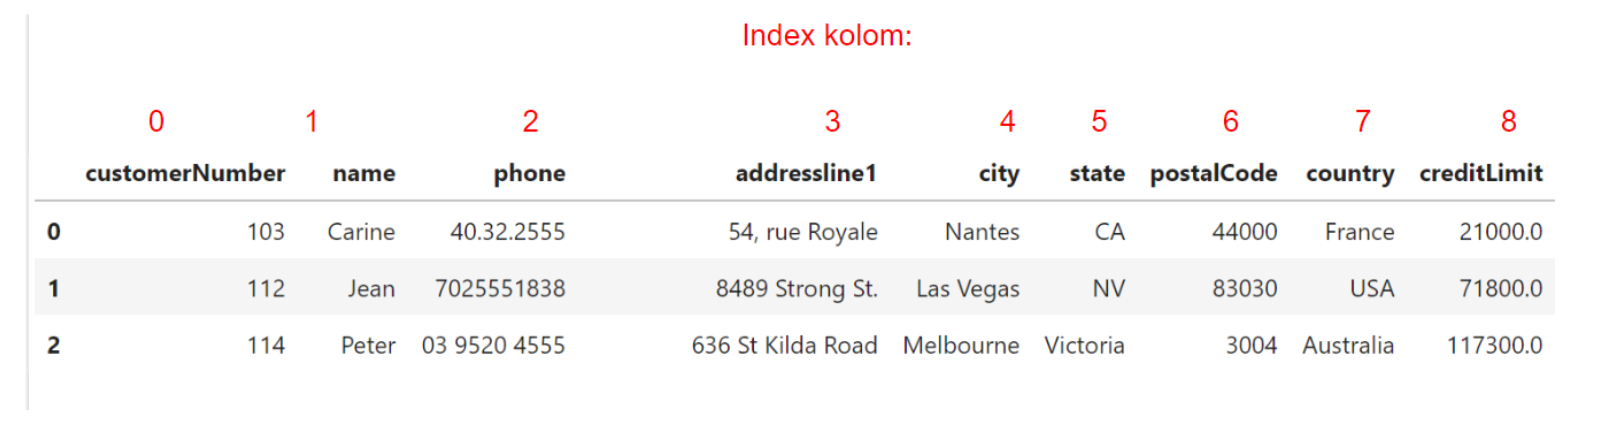

Konsep index pada dataframe sama dengan index pada list, sehingga cara pengaksesannya juga sama.

`index_start:index_end`

In [16]:
# import library
import pandas as pd

# read data customer
customer_data = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-5/customers_data.csv")

In [17]:
# akses data pada urutan 1-7
customer_data.iloc[0:7]

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
0,103,Carine,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
1,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
2,114,Peter,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
3,119,Janine,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
4,121,Jonas,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0
5,124,Susan,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
6,125,Zbyszek,(26) 642-7555,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,0.0


In [18]:
# akses data pada urutan 1-7 dan kolom
customer_data.iloc[0:7, 0:3]

,customerNumber,name,phone
0,103,Carine,40.32.2555
1,112,Jean,7025551838
2,114,Peter,03 9520 4555
3,119,Janine,40.67.8555
4,121,Jonas,07-98 9555
5,124,Susan,4155551450
6,125,Zbyszek,(26) 642-7555


New Case: \
Rahman diminta kembali untuk menampilkan data *name, phone, addressline1, country dan creditLimit* dari tiap customer.

\
Pada kasus ini kolom yang diakses tiak berurutan. Jika index/kolom yang diakses tidak berurutan, pengaksesan dapat dilakukan dengan cara memasukkan index/posisi dari setiap kolom ke dalam list.

Pada kasus ini, tiap kolom yang diakses berada pada index:

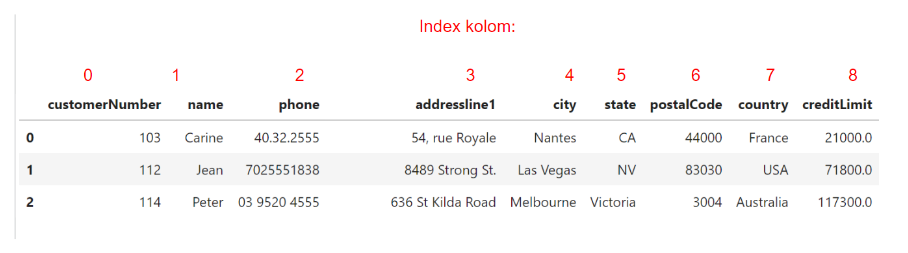
Sehingga:


In [19]:
# simpan index kolom yang akan di akses ke dalam list
index_columns = [1,2,3,7,8]

# akses dari urutan 1-7 pada kolom name, phone, addressline1, country dan credicLimit
customer_data.iloc[0:7, index_columns]

,name,phone,addressline1,country,creditLimit
0,Carine,40.32.2555,"54, rue Royale",France,21000.0
1,Jean,7025551838,8489 Strong St.,USA,71800.0
2,Peter,03 9520 4555,636 St Kilda Road,Australia,117300.0
3,Janine,40.67.8555,"67, rue des Cinquante Otages",France,118200.0
4,Jonas,07-98 9555,Erling Skakkes gate 78,Norway,81700.0
5,Susan,4155551450,5677 Strong St.,USA,210500.0
6,Zbyszek,(26) 642-7555,ul. Filtrowa 68,Poland,0.0


#### **loc**

Selain menggunakan posisi, pengaksesan data juga dapat dilakukan dengan menggunakan label dan nama kolom.

Rahman ingin mengakses data *customerNumber, phone, dan addressLine1*  dari customer yang bernama **Peter, Janine, Jona, dan Susan**.

> Note: Karena data keempat customer tersebut berurutan, maka dapat menggunakan operator slice: `label_start:label_end`

In [20]:
# set kolomn nama sebagai index
customer_data.set_index("name", inplace=True)

In [21]:
# memanggil 5 data teratas pada customer_data
customer_data.head(10)

,customerNumber,phone,addressline1,city,state,postalCode,country,creditLimit
name,,,,,,,,
Carine,103,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
Jean,112,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
Peter,114,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
Janine,119,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
Jonas,121,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0
Susan,124,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
Zbyszek,125,(26) 642-7555,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,0.0
Roland,128,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,59700.0
Julie,129,6505555787,5557 North Pendale Street,San Francisco,CA,94217,USA,64600.0


In [22]:
# mengakses data pada baris dengan index Peter hingga Susan dalam customerNumber hingga addressLine1

customer_data.loc['Peter':'Susan', 'customerNumber': 'addressline1']

,customerNumber,phone,addressline1
name,,,
Peter,114,03 9520 4555,636 St Kilda Road
Janine,119,40.67.8555,"67, rue des Cinquante Otages"
Jonas,121,07-98 9555,Erling Skakkes gate 78
Susan,124,4155551450,5677 Strong St.


## **03 - Data Selection by Condition**

- Berfungsi untuk memilih data berdasarkan suatu kondisi pada kolom tertentu.
- Penggunaannya mirip seperti `SELECT` dan `WHERE` pada MySQL.
- Seleksi data berdasarkan kondisi layaknya indexing baris, namun yang diparameternya bukanlah index-nya, melainkan kondisi.
- Untuk melakukan boolean indexing maka kita harus menetukan kondisinya terlebih dahulu.
- Operator perbandingan dapat digunakan untuk membuat kondisi data yang ingin diakses. Operator tersebut sama seperti operator yang biasa digunakan dalam bahasa Python

| Operator                                       | Simbol |
|------------------------------------------------|--------|
| lebih kecil dari                               | <      |
| lebih besar dari                               | >      |
| lebih kecil atau sama dengan                   | <=     |
| lebih besar atau sama dengan                   | >=     |
| cek kesamaan                                   | ==     |
| cek ketidaksamaan                              | !=     |

Kita akan melakukan seleksi dengan kondisi pada data customers, dimana customers tersebut tinggal di negara `USA`

In [23]:
# import library
import pandas as pd

# read data customer
customer_data = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-5/customers_data.csv")

In [24]:
customer_data.head()

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
0,103,Carine,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
1,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
2,114,Peter,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,117300.0
3,119,Janine,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
4,121,Jonas,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,4110,Norway,81700.0


In [25]:
# melakukan pengecekan jika nilai kolom country sama dengan USA
customer_data['country'] == 'USA'

0     False
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8      True
9      True
10    False
11    False
12    False
13    False
14    False
15     True
16     True
17     True
18    False
19    False
Name: country, dtype: bool

- Hasil di atas merupakan Series yang index-nya berasal dari DataFrame, dan nilainya adalah nilai booleanx (True atau False)
- Kondisi ini yang digunakan untuk melakukan boolean indexing
- Hal ini dilakukan dengan memanggil DataFrame, kemudian diikuti dengan kondisi (seperti di atas) yang dibungkus dengan kurung kotak `[ ]`

In [26]:
# mengakses data berdasarkan kondisi kolom country
customer_data.loc[customer_data['country'] == 'USA']

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
1,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
5,124,Susan,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
8,129,Julie,6505555787,5557 North Pendale Street,San Francisco,CA,94217,USA,64600.0
9,131,Kwai,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,114900.0
15,151,Jeff,2125557413,4092 Furth Circle,NYC,NY,10022,USA,138500.0
16,157,Kelvin,2155551555,7586 Pompton St.,Allentown,PA,70267,USA,100600.0
17,161,Juri,6505556809,9408 Furth Circle,Burlingame,CA,94217,USA,84600.0


- loc digunakan karena index dari kondisi adalah label.
- Selain dengan loc, kita juga dapat langsung tanpa menggunakan loc

In [27]:
# Mengakses data berdasarkan kondisi pada kolom country
customer_data[ customer_data['country'] == 'USA' ]

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
1,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
5,124,Susan,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
8,129,Julie,6505555787,5557 North Pendale Street,San Francisco,CA,94217,USA,64600.0
9,131,Kwai,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,114900.0
15,151,Jeff,2125557413,4092 Furth Circle,NYC,NY,10022,USA,138500.0
16,157,Kelvin,2155551555,7586 Pompton St.,Allentown,PA,70267,USA,100600.0
17,161,Juri,6505556809,9408 Furth Circle,Burlingame,CA,94217,USA,84600.0


- Jika hanya ingin mengambil beberapa kolom saja, maka hasil selection dapat diikuti dengan indexing kolom.
- Sebagai contoh, kita hanya ingin melihat `name` dan `phone` dari orang yang tinggal di USA

In [28]:
customer_data[customer_data['country'] == 'USA'][["name", "phone"]]

,name,phone
1,Jean,7025551838
5,Susan,4155551450
8,Julie,6505555787
9,Kwai,2125557818
15,Jeff,2125557413
16,Kelvin,2155551555
17,Juri,6505556809


- Apabila kondisi yang diinginkan lebih dari satu, maka dapat menggunakan operator and atau or
- Untuk mengeakses invers dari kondisi dapat menggunakan operator not

| Operator Python | Operator Vektor |
|---|---|
| _or_ | \| |
| _and_   | & |
| _not_ | ~ |

- Tiap kondisi dikurung dengan kurung biasa `(  )`

Contohnya, Rahman akan mengakses data customer yang berasal dari negara USA dan credit limitnya diatas 70000:

In [29]:
customer_data[ (customer_data['country'] == 'USA') & (customer_data['creditLimit'] > 70000)]

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
1,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
5,124,Susan,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,210500.0
9,131,Kwai,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,114900.0
15,151,Jeff,2125557413,4092 Furth Circle,NYC,NY,10022,USA,138500.0
16,157,Kelvin,2155551555,7586 Pompton St.,Allentown,PA,70267,USA,100600.0
17,161,Juri,6505556809,9408 Furth Circle,Burlingame,CA,94217,USA,84600.0


Contoh lainnya, Rahman akan mengakses data customer yang berasal dari negara France atau Germany atau customer yang tinggal di kota Las Vegas:

In [30]:
# mengakses data customer yang tinggal di negara France atau Germany atau tinggal di kota Las Vegas
customer_data[ (customer_data['country'] == 'France') | (customer_data['country'] == 'Germany') | (customer_data['city'] == 'Las Vegas') ]

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
0,103,Carine,40.32.2555,"54, rue Royale",Nantes,CA,44000,France,21000.0
1,112,Jean,7025551838,8489 Strong St.,Las Vegas,NV,83030,USA,71800.0
3,119,Janine,40.67.8555,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,118200.0
7,128,Roland,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,59700.0
13,146,Mary,78.32.5555,"2, rue du Commerce",Lyon,NaN,69004,France,123900.0


Seleksi data berdasarkan kondisi dapat juga dilakukan dengan menggunakan method yang ada di pandas. yaitu:
- where
- mask
- query

## **04 - Slicing Data with Multiple Index**

- Pada umumnya, jika membuat dataframe atau Series di dalam pandas, maka dataframe atau series tersebut hanya akan memiliki satu index.
- Menggunakan Pandas kita dapat membuat kolom menjadi index. Tidak hanya membuat satu index namum bisa juga beberapa index.
- Teknik ini disebut dengan MultiIndex atau hierarchial index.
- Hierarchial Index memiliki arti bahwa DataFrame akan memiliki dua atau lebih dimensi yang dapat digunakan untuk mengidentifikasi tiap baris.
- Untuk membuat MultiIndex, perlu memasukkan list dari nama kolom kedalam fungsi `.set_index()`

In [31]:
# import library
import pandas as pd

In [32]:
# read data customer
customer_data = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-5/customers_data.csv")

In [33]:
# membuat multiple index menggunakan kolom country dan city
multiindex_customers_data = customer_data.set_index(['country', 'city'])

# memanggil dataframe multiindex
multiindex_customers_data.head()

,,customerNumber,name,phone,addressline1,state,postalCode,creditLimit
country,city,,,,,,,
France,Nantes,103,Carine,40.32.2555,"54, rue Royale",CA,44000,21000.0
USA,Las Vegas,112,Jean,7025551838,8489 Strong St.,NV,83030,71800.0
Australia,Melbourne,114,Peter,03 9520 4555,636 St Kilda Road,Victoria,3004,117300.0
France,Nantes,119,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,44000,118200.0
Norway,Stavern,121,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,4110,81700.0


In [34]:
# Multiindex lebih dari 2 kolom
multiindex_customers_data = customer_data.set_index(['country', 'city', 'name'])

# memanggil dataframe multiindex
multiindex_customers_data.head()

,,,customerNumber,phone,addressline1,state,postalCode,creditLimit
country,city,name,,,,,,
France,Nantes,Carine,103,40.32.2555,"54, rue Royale",CA,44000,21000.0
USA,Las Vegas,Jean,112,7025551838,8489 Strong St.,NV,83030,71800.0
Australia,Melbourne,Peter,114,03 9520 4555,636 St Kilda Road,Victoria,3004,117300.0
France,Nantes,Janine,119,40.67.8555,"67, rue des Cinquante Otages",NaN,44000,118200.0
Norway,Stavern,Jonas,121,07-98 9555,Erling Skakkes gate 78,NaN,4110,81700.0


- Pada kondisi tertentu mengakses data menggunakan multiindex lebih mudah dibanding menggunakan pengkondisian. Contoh:

Rahman ingin mengetahui credit limit dari customers yang tinggal di USA kota NYC

In [35]:
# menggunakan pengkondisian
customer_data[(customer_data["country"]== "USA") & (customer_data["city"] == "NYC")]

,customerNumber,name,phone,addressline1,city,state,postalCode,country,creditLimit
9,131,Kwai,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,114900.0
15,151,Jeff,2125557413,4092 Furth Circle,NYC,NY,10022,USA,138500.0


In [36]:
multiindex_customers_data.head()

,,,customerNumber,phone,addressline1,state,postalCode,creditLimit
country,city,name,,,,,,
France,Nantes,Carine,103,40.32.2555,"54, rue Royale",CA,44000,21000.0
USA,Las Vegas,Jean,112,7025551838,8489 Strong St.,NV,83030,71800.0
Australia,Melbourne,Peter,114,03 9520 4555,636 St Kilda Road,Victoria,3004,117300.0
France,Nantes,Janine,119,40.67.8555,"67, rue des Cinquante Otages",NaN,44000,118200.0
Norway,Stavern,Jonas,121,07-98 9555,Erling Skakkes gate 78,NaN,4110,81700.0


In [37]:
# menggunakan multiindex
multiindex_customers_data.loc["USA", "NYC"]

<ipython-input-37-0fb50ee08b49>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  multiindex_customers_data.loc["USA", "NYC"]


,customerNumber,phone,addressline1,state,postalCode,creditLimit
name,,,,,,
Kwai,131,2125557818,897 Long Airport Avenue,NY,10022,114900.0
Jeff,151,2125557413,4092 Furth Circle,NY,10022,138500.0


In [38]:
# menggunakan multiindex dan memanggil kolom credit limit saja
multiindex_customers_data.loc["USA", "NYC"][["creditLimit"]]

<ipython-input-38-441ef82946b1>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  multiindex_customers_data.loc["USA", "NYC"][["creditLimit"]]


,creditLimit
name,
Kwai,114900.0
Jeff,138500.0


Rahman ingin mengetahui nomor telpon dan alamat dari customer yang bersal dari negara Singapore dan bernama Wendy?

- Pada kasus ini parameter yang diketahui hanya country dan name
- Untuk index city akan diakses semua datanya. Untuk melakukannya akan digunakan perintah `slice(None)`

In [39]:
# Mengakses customer yang berasal dari negara Singapore dan bernama Wendy
multiindex_customers_data.loc['Singapore', slice(None), "Wendy"][["phone", "addressline1"]]

,phone,addressline1
city,,
Singapore,+65 224 1555,106 Linden Road Sandown


## **LIVE CLASS**

**Outline**

1. Study case 1: Mengakses data penumpang kapal Part 1
2. Study case 2: Mengakses data penumpang kapal Part 2
3. Study case 3: Menganalisis karakter pada film

In [40]:
# import pandas
import pandas as pd

### **Study Case 1: Mengakses data penumpang kapal**
___

Anda mendapat tugas untuk mencari informasi data kecelakaan penumpang kapal.


In [41]:
import pandas as pd

In [42]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/ham407/Data-Selection-Using-Python/main/Datasets/titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Deskripsi kolom:
- PassengerId : id dari tiap penumpang
- Survived : penumpang yang masih hidup disimbolkan dengan angka 1dan angka 0 untuk meninggal.
- Passenger Class : kategori kelas penumpang dari 1st class sebagai passenger class tertinggi hingga menurun ke 2nd class dan 3rd class.
- Name : nama setiap penumpang.
- Sex : jenis kelamin penumpang yang dibedakan menjadi male dan female.
- Age : usia penumpang dari yang termuda hingga tertua dalam satuan tahun.
- Sibling-Spouse (SibSp): jumlah saudara dan pasangan yang dibawa ke kapal
- Parent-Children (Parch): jumlah orang tua dan anak yang dibawa
- Ticket : Kode tiket penumpang
- Fare : tarif tiket sesuai dengan passenger class-nya. Semakin tinggi passenger class semakin tinggi juga tarif yang harus dikeluarkan.
- Cabin: Kode kabin yang ditempati di kapal
- Embarked : lokasi keberangkatan penumpang dari C = Cherbourg, Q = Queenstown dan S = Southampton.




#### 1.1
Tampilkan data 10 penumpang teratas yang ada di dalam tabel


In [43]:
# menggunakan fungsi iloc
titanic_data.iloc[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
# menggunakan fungsi head
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### **1.2**
Tampilkan informasi nama, umur, tiket, dan fare dari 10 penumpang terakhir yang ada di dalam tabel

In [45]:
# Menggunakan iloc
titanic_data.iloc[-10:, [3, 5, 8, 9]]

,Name,Age,Ticket,Fare
881,"Markun, Mr. Johann",33.0,349257,7.8958
882,"Dahlberg, Miss. Gerda Ulrika",22.0,7552,10.5167
883,"Banfield, Mr. Frederick James",28.0,C.A./SOTON 34068,10.5000
884,"Sutehall, Mr. Henry Jr",25.0,SOTON/OQ 392076,7.0500
885,"Rice, Mrs. William (Margaret Norton)",39.0,382652,29.1250
886,"Montvila, Rev. Juozas",27.0,211536,13.0000
887,"Graham, Miss. Margaret Edith",19.0,112053,30.0000
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,W./C. 6607,23.4500
889,"Behr, Mr. Karl Howell",26.0,111369,30.0000
890,"Dooley, Mr. Patrick",32.0,370376,7.7500


In [46]:
# menggunakan fungsi tail
titanic_data.tail(10)[["Name", 'Age', 'Ticket', 'Fare']]

,Name,Age,Ticket,Fare
881,"Markun, Mr. Johann",33.0,349257,7.8958
882,"Dahlberg, Miss. Gerda Ulrika",22.0,7552,10.5167
883,"Banfield, Mr. Frederick James",28.0,C.A./SOTON 34068,10.5000
884,"Sutehall, Mr. Henry Jr",25.0,SOTON/OQ 392076,7.0500
885,"Rice, Mrs. William (Margaret Norton)",39.0,382652,29.1250
886,"Montvila, Rev. Juozas",27.0,211536,13.0000
887,"Graham, Miss. Margaret Edith",19.0,112053,30.0000
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,W./C. 6607,23.4500
889,"Behr, Mr. Karl Howell",26.0,111369,30.0000
890,"Dooley, Mr. Patrick",32.0,370376,7.7500


#### **1.3**
Tampilkan informasi Survived hingga	Ticket dari penumpang yang bernama `Braund, Mr. Owen Harris`, `Heikkinen, Miss. Laina` dan `Markun, Mr. Johann`

Note: Jadikan kolom nama sebagai index

In [47]:
# set kolom nama sebagai index
titanic_data = titanic_data.set_index("Name")
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [48]:
# Memanggil nama dan kolom yang diinginkan
titanic_data.loc[['Braund, Mr. Owen Harris', 'Heikkinen, Miss. Laina',  'Markun, Mr. Johann'], "PassengerId":"Ticket"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket
Name,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282
"Markun, Mr. Johann",882,0,3,male,33.0,0,0,349257


#### **1.4**
Tampilkan informasi Age, Ticket dan Embarked dari penumpang yang bernama  `Heikkinen, Miss. Laina` hingga `Palsson, Master. Gosta Leonard`

In [49]:
titanic_data.loc[
    'Heikkinen, Miss. Laina' : "Palsson, Master. Gosta Leonard",
     ["Age", "Ticket", "Embarked"]
    ]

,Age,Ticket,Embarked
Name,,,
"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,S
"Allen, Mr. William Henry",35.0,373450,S
"Moran, Mr. James",NaN,330877,Q
"McCarthy, Mr. Timothy J",54.0,17463,S
"Palsson, Master. Gosta Leonard",2.0,349909,S


#### Exercise

1. Ubah index menjadi kolom passengerId tanpa menghilangkan kolom nama
2. Tampilkan data penumpang yang memiliki id 29, 78 dan 66
3. Tampilkan informasi penumpang yang memiliki id 40-50 dan tampilkan informasi Name, Sibsp dan Parch-nya
4. Tampilkan informasi Ticket dari penumpang dengan id 887
5. Kembalikan index ke bentuk defaultnya(index awal)

---

1. Ubah index menjadi kolom passengerld tanpa menghilangkan kolom nama

In [50]:
# reset index
titanic_data.reset_index(inplace=True)

In [51]:
# set passengerID sebagai index
titanic_data.set_index('PassengerId')

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,113803,53.1000,C123,S
5,"Allen, Mr. William Henry",0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",0,2,male,27.0,0,0,211536,13.0000,NaN,S
888,"Graham, Miss. Margaret Edith",1,1,female,19.0,0,0,112053,30.0000,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


---

2. Tampilkan data penumpang yang memiliki id 29, 78 dan 66

In [52]:
titanic_data.loc[[29,78,66]]

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
29,"Todoroff, Mr. Lalio",30,0,3,male,NaN,0,0,349216,7.8958,NaN,S
78,"Caldwell, Master. Alden Gates",79,1,2,male,0.83,0,2,248738,29.0000,NaN,S
66,"Nye, Mrs. (Elizabeth Ramell)",67,1,2,female,29.00,0,0,C.A. 29395,10.5000,F33,S


---

3. Tampilkan informasi penumpang yang memiliki di 40-50 dan tampilkan informasi name, sibsp dan Parch-nya

In [53]:
titanic_data.loc[40:50, ["Name","SibSp","Parch"]]

,Name,SibSp,Parch
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",1,0
41,"Turpin, Mrs. William John Robert (Dorothy Ann ...",1,0
42,"Kraeff, Mr. Theodor",0,0
43,"Laroche, Miss. Simonne Marie Anne Andree",1,2
44,"Devaney, Miss. Margaret Delia",0,0
45,"Rogers, Mr. William John",0,0
46,"Lennon, Mr. Denis",1,0
47,"O'Driscoll, Miss. Bridget",0,0
48,"Samaan, Mr. Youssef",2,0
49,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",1,0


---

4. Tampilkan informasi Ticket dari penumpang dengan id 887

In [54]:
titanic_data.loc[887, "Ticket"]

'112053'

In [55]:
titanic_data.reset_index(inplace=True)

# tampilkan
titanic_data

,index,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,887,"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,888,"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C


### **Study Case 2:  Mengakses Data Penumpang Kapal**
___

Kali ini anda diminta untuk mengakses data penumpang berdasarkan kondisinya.

#### 2.1
Tampilkan data penumpang yang memiliki Gender female

In [56]:
# kondisi pencarian
kondisi = titanic_data['Sex'] == 'female'
kondisi2 = titanic_data['Cabin'] == 'C123'

In [57]:
# filter data berdasarkan kondisi
titanic_data[kondisi & kondisi2]

,index,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1,C123,S


In [58]:
# mengakses data berdasarkan kondisi
titanic_data[titanic_data['Sex'] == 'female']

,index,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
8,8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,9,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,2,female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,880,"Shelley, Mrs. William (Imanita Parrish Hall)",881,1,2,female,25.0,0,1,230433,26.0000,NaN,S
882,882,"Dahlberg, Miss. Gerda Ulrika",883,0,3,female,22.0,0,0,7552,10.5167,NaN,S
885,885,"Rice, Mrs. William (Margaret Norton)",886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q
887,887,"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S


 #### **2.2**
Tampilkan data name, Age, Pclass dan Fare dari penumpang yang usianya diatas 40 tahun

In [59]:
# penumpang yang memiliki usia diatas 40 tahun
titanic_data[titanic_data['Age'] > 40 ] [['Name', 'Age', 'Pclass', 'Fare']]

,Name,Age,Pclass,Fare
6,"McCarthy, Mr. Timothy J",54.0,1,51.8625
11,"Bonnell, Miss. Elizabeth",58.0,1,26.5500
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0,2,16.0000
33,"Wheadon, Mr. Edward H",66.0,2,10.5000
35,"Holverson, Mr. Alexander Oskar",42.0,1,52.0000
...,...,...,...,...
862,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,1,25.9292
865,"Bystrom, Mrs. (Karolina)",42.0,2,13.0000
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,52.5542
873,"Vander Cruyssen, Mr. Victor",47.0,3,9.0000


#### **2.3**
Tampilkan data penumpang yang harga tiketnya diatas 50$ dan berangkat dari port Southampton

In [60]:
titanic_data[(titanic_data['Fare'] > 50 ) & (titanic_data['Embarked'] == "S")]

,index,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,6,"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
27,27,"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
35,35,"Holverson, Mr. Alexander Oskar",36,0,1,male,42.0,1,0,113789,52.0000,NaN,S
62,62,"Harris, Mr. Henry Birkhardt",63,0,1,male,45.0,1,0,36973,83.4750,C83,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,846,"Sage, Mr. Douglas Bullen",847,0,3,male,NaN,8,2,CA. 2343,69.5500,NaN,S
856,856,"Wick, Mrs. George Dennick (Mary Hitchcock)",857,1,1,female,45.0,1,1,36928,164.8667,NaN,S
863,863,"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
867,867,"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S


#### **2.4**
Tampilkan informasi Name, Embarked, SibSp dan Parch dari  penumpang yang SibSp-nya lebih dari 6 atau Parch lebih dari 2

In [61]:
titanic_data[(titanic_data['SibSp'] > 6) | (titanic_data['Parch'] > 2)] [['Name', 'Embarked', 'SibSp', 'Parch']]

,Name,Embarked,SibSp,Parch
13,"Andersson, Mr. Anders Johan",S,1,5
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",S,1,5
86,"Ford, Mr. William Neal",S,1,3
159,"Sage, Master. Thomas Henry",S,8,2
167,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",S,1,4
180,"Sage, Miss. Constance Gladys",S,8,2
201,"Sage, Mr. Frederick",S,8,2
324,"Sage, Mr. George John Jr",S,8,2
360,"Skoog, Mr. Wilhelm",S,1,4
437,"Richards, Mrs. Sidney (Emily Hocking)",S,2,3


#### **Exercise**
1. Tampilkan nama dan gender penumpang yang survived dan memiliki  usia dibawah 25 tahun.
2. Tampilkan data penumpang yang survived dan berangkat dari port Queenstown atau Southampton
3. Tampilkan data penumpang yang jumlah anggota keluarganya lebih dari 7
4. Tampilkan data penumpang yang tidak survived, memiliki anggota keluarga lebih dari 5 dan tidak berangkat dari port Queenstown

<details>
    <summary><b>Klik untuk melihat kunci jawaban</b></summary>

```python
# 1. Tampilkan nama dan gender penumpang yang survived dan memiliki rentang usia 25-40 tahun.
titanic_data[(titanic_data["Survived"] == 1) & (titanic_data["Age"] < 25 )]

# 2. Tampilkan data penumpang yang survived dan berangkat dari port Queenstown
titanic_data[(titanic_data["Survived"] == 1) & ((titanic_data["Embarked"] == "Q") | (titanic_data["Embarked"] == "S"))]


# 3. Tampilkan data penumpang yang jumlah anggota keluarganya lebih dari 7

titanic_data['FamSize'] = titanic_data["SibSp"] + titanic_data["Parch"]
titanic_data[titanic_data["FamSize"] > 7]

# 4. Tampilkan data penumpang yang tidak survived, memiliki anggota keluarga lebih dari 8 dan tidak berangkat dari port Queenstown
```
titanic_data[(titanic_data["Survived"] == 0) & (titanic_data['FamSize'] > 5) & (titanic_data["Embarked"] != "Q")]

</details>

---

### **Study Case 3: Menganalisis karakter pada film**
Anda ditugaskan untuk menganalisis karakter pada film menggunakan data yang tersimpan dalam bentuk csv dengan nama file 'WordsbyCharacter.csv'

In [62]:
lotr = pd.read_csv('https://raw.githubusercontent.com/ham407/Data-Selection-Using-Python/main/Datasets/WordsByCharacter.csv')
lotr.head()

,Film,Chapter,Character,Race,Words
0,The Fellowship Of The Ring,01: Prologue,Bilbo,Hobbit,4
1,The Fellowship Of The Ring,01: Prologue,Elrond,Elf,5
2,The Fellowship Of The Ring,01: Prologue,Galadriel,Elf,460
3,The Fellowship Of The Ring,01: Prologue,Gollum,Gollum,20
4,The Fellowship Of The Ring,02: Concerning Hobbits,Bilbo,Hobbit,214


#### 3.1
Siapa saja karakter yang berbicara pada chapter pertama "The Fellowship of the Ring?"

In [63]:
lotr[(lotr['Film'] == 'The Fellowship Of The Ring') & (lotr['Chapter'] == '01: Prologue')]

,Film,Chapter,Character,Race,Words
0,The Fellowship Of The Ring,01: Prologue,Bilbo,Hobbit,4
1,The Fellowship Of The Ring,01: Prologue,Elrond,Elf,5
2,The Fellowship Of The Ring,01: Prologue,Galadriel,Elf,460
3,The Fellowship Of The Ring,01: Prologue,Gollum,Gollum,20


In [64]:
# menggunakan multiindex
# set multiindex
multi = lotr.set_index(['Film', 'Chapter', 'Race', 'Character'])

In [65]:
# tampilkan
multi

Words
Film                       Chapter                Race   Character       
The Fellowship Of The Ring 01: Prologue           Hobbit Bilbo          4
                                                  Elf    Elrond         5
                                                         Galadriel    460
                                                  Gollum Gollum        20
                           02: Concerning Hobbits Hobbit Bilbo        214
...                                                                   ...
The Return Of The King     76: The Grey Havens    Elf    Elrond         6
                                                  Hobbit Frodo        132
                                                  Elf    Galadriel     17
                                                  Ainur  Gandalf       42
                                                  Hobbit Sam           14

[731 rows x 1 columns]

In [66]:
multi.loc[('The Fellowship Of The Ring', '01: Prologue')]

<ipython-input-66-3f6e40e91e53>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  multi.loc[('The Fellowship Of The Ring', '01: Prologue')]


Words
Race   Character       
Hobbit Bilbo          4
Elf    Elrond         5
       Galadriel    460
Gollum Gollum        20

#### 3.2
Siapa tiga elf pertama yang berbicara pada film "The Fellowship of the Ring"?


In [67]:
multi.loc[('The Fellowship Of The Ring', slice(None), 'Elf'), :].head(3)

Words
Film                       Chapter                Race Character       
The Fellowship Of The Ring 01: Prologue           Elf  Elrond         5
                                                       Galadriel    460
                           21: Flight To The Ford Elf  Arwen        131

#### 3.3
Seberapa banyak Gandalf dan Saruman berbicara dalam tiap chapter di "The Two Towers"


In [68]:
multi.loc[('The Two Towers', slice(None), slice(None), ['Gandalf', 'Saruman']), :]

Words
Film           Chapter                                           Race  Character       
The Two Towers 01: The Foundations Of Stone                      Ainur Gandalf       39
               15: The White Rider                               Ainur Gandalf      298
               17: The Heir Of Númenor                           Ainur Gandalf      226
               20: The King Of The Golden Hall                   Ainur Gandalf      151
               22: Simbelmynë on the Burial Mounds               Ainur Gandalf       28
               23: The King's Decision                           Ainur Gandalf      165
               58: Forth Eorlingas                               Ainur Gandalf       21
               65: The Battle For Middle Earth Is About To Begin Ainur Gandalf       36
               06: The Burning of the Westfold                   Ainur Saruman      187
               25: The Ring Of Barahir                           Ainur Saruman       68
               27: Exodus From Edoras                            Ainur Saruman        4
               36: Isengard Unleashed                            Ainur Saruman       50

#### 3.4
Berapa banyak Isildur berbicara dalam semua film?


In [69]:
multi.loc[(slice(None),slice(None),slice(None),'Isildur'), :]

,,,,Words
Film,Chapter,Race,Character,
The Fellowship Of The Ring,24: The Fate Of The Ring,Men,Isildur,1


### Exercise

1. Siapakah karakter yang berbicara pada chapter 03: The Shire pada "The Fellowship of the Ring"
2. Berapa kali Gollum berbicara untuk tiap chapter pada "The Return Of The King".

<details>
    <summary><b>Klik untuk melihat kunci jawaban</b></summary>

```python
# 1. Siapakah karakter yang berbicara pada chapter 03: The Shire pada "The Fellowship of the Ring"
lotr = pd.read_csv('WordsByCharacter.csv').set_index(['Film', 'Chapter', 'Race', 'Character'])
lotr.loc[('The Fellowship Of The Ring', '03: The Shire'), :]

# 2. Berapa kali Gollum berbicara untuk tiap chapter pada "The Return Of The King".
lotr.loc[('The Return Of The King',slice(None),slice(None),'Gollum'), :]
```

</details>

---

In [70]:
# 1. Siapakah karakter yang berbicara pada chapter 03: The Shire pada "The Fellowship of the Ring"
lotr = pd.read_csv('https://raw.githubusercontent.com/ham407/Data-Selection-Using-Python/main/Datasets/WordsByCharacter.csv').set_index(['Film', 'Chapter', 'Race', 'Character'])
lotr.loc[('The Fellowship Of The Ring', '03: The Shire'), :]

<ipython-input-70-f92fa09003b8>:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  lotr.loc[('The Fellowship Of The Ring', '03: The Shire'), :]


Words
Race   Character         
Hobbit Bilbo           70
       Frodo          128
Ainur  Gandalf        197
Hobbit Hobbit Kids     10
       Hobbits         12

In [71]:
# 2. Berapa kali Gollum berbicara untuk tiap chapter pada "The Return Of The King".
lotr.loc[('The Return Of The King',slice(None),slice(None),'Gollum'), :]

Words
Film                   Chapter                            Race   Character       
The Return Of The King 01: The Finding Of The Ring        Gollum Gollum         3
                       02: Journey To The Cross-roads     Gollum Gollum        41
                       06: Gollum's Villany               Gollum Gollum       149
                       13: Cross-roads Of The Fallen King Gollum Gollum        13
                       15: Minas Morgul                   Gollum Gollum        50
                       16: Sam's Warning                  Gollum Gollum        13
                       23: The Stairs Of Cirith Ungol     Gollum Gollum        76
                       27: The Parting Of Sam & Frodo     Gollum Gollum        79
                       38: Shelob's Lair                  Gollum Gollum        64
                       68: Mount Doom                     Gollum Gollum        17
                       70: The Crack Of Doom              Gollum Gollum         5